#  Data Analytics Final Project
**Dataset Details:**
- **Source:** UCI Machine Learning Repository
- **Records:** 48,842 individuals
- **Features:** 15 columns (age, education, occupation, income, etc.)
- **Domain**:**Economics**
- **Target Variable:** Income (>50K or <=50K)

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("Set2")
%matplotlib inline

print(" All libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

 All libraries imported successfully!
Pandas version: 2.2.2
NumPy version: 2.0.2


---
##  Section 1: Data Loading and Initial Overview


In [ ]:
from google.colab import files

print(" Click 'Choose Files' and select 'adult.data' from your Downloads folder")
uploaded = files.upload()

print("\n File uploaded successfully!")
print(f"Uploaded file: {list(uploaded.keys())[0]}")

 Click 'Choose Files' and select 'adult.data' from your Downloads folder


Saving adult.data.csv to adult.data.csv

 File uploaded successfully!
Uploaded file: adult.data.csv


In [ ]:
import os

# List all files in the current directory
print(" Files in current directory:")
print("="*70)
for file in os.listdir():
    print(f"  • {file}")

 Files in current directory:
  • .config
  • adult.data.csv
  • sample_data


In [ ]:
import pandas as pd

# Download directly
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

# Define column names
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

# Load dataset directly from URL
print(" Downloading dataset from UCI Repository...")
df = pd.read_csv(url, names=column_names, skipinitialspace=True)

print(" Dataset loaded successfully!")
print(f"\n Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f" Number of Features: {df.shape[1]}")
print("\n" + "="*70)
print("First 5 rows:")
display(df.head())

 Dataset loaded successfully!

 Dataset Shape: 32561 rows × 15 columns
 Number of Features: 15

First 5 rows:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


---
##  Section 2: Data Pre-processing and Cleaning


In [ ]:
# Display dataset information
print(" DATASET INFORMATION")
print("="*70)
df.info()

 DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### 2.2 Statistical Summary

In [ ]:
# Statistical summary
print(" STATISTICAL SUMMARY OF NUMERICAL FEATURES")
print("="*70)
df.describe()

 STATISTICAL SUMMARY OF NUMERICAL FEATURES


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### 2.3 Missing Values Analysis


In [ ]:
print(" MISSING VALUES CHECK")
print("="*70)

# Check standard null values
print("\n1. Standard NULL values:")
print(df.isnull().sum())

# Check for '?' values
print("\n2. '?' values (missing data indicators):")
missing_values = {}
for col in df.columns:
    count = (df[col] == '?').sum()
    if count > 0:
        missing_values[col] = count

if missing_values:
    for col, count in missing_values.items():
        print(f"   {col}: {count} ({count/len(df)*100:.2f}%)")
else:
    print("   No '?' values found")

# Total missing
print(f"\n3. Total records with missing values: {df.isin(['?']).any(axis=1).sum()}")

 MISSING VALUES CHECK

1. Standard NULL values:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

2. '?' values (missing data indicators):
   workclass: 1836 (5.64%)
   occupation: 1843 (5.66%)
   native-country: 583 (1.79%)

3. Total records with missing values: 2399


### 2.4 Data Cleaning


In [ ]:
# Replace '?' with NaN and handle missing values
print(" CLEANING DATA...")
print("="*70)

# Replace '?' with NaN
df = df.replace('?', pd.NA)

# Check columns with missing values
print("\nColumns with missing values:")
missing_cols = df.columns[df.isna().any()].tolist()
print(missing_cols)

# Drop rows with missing values
original_size = len(df)
df = df.dropna()
new_size = len(df)

print(f"\n Removed {original_size - new_size} rows with missing values")
print(f" New dataset shape: {df.shape[0]} rows × {df.shape[1]} columns")

# Reset index
df = df.reset_index(drop=True)
print(" Index reset complete")

 CLEANING DATA...

Columns with missing values:
['workclass', 'occupation', 'native-country']

 Removed 2399 rows with missing values
 New dataset shape: 30162 rows × 15 columns
 Index reset complete


### 2.5 Data Type Optimization

In [ ]:
# Convert numerical columns to appropriate types
print(" OPTIMIZING DATA TYPES...")
print("="*70)

# Convert numerical columns
numerical_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain',
                  'capital-loss', 'hours-per-week']

for col in numerical_cols:
    df[col] = pd.to_numeric(df[col])

# Strip whitespace from all string columns
string_cols = df.select_dtypes(include='object').columns
for col in string_cols:
    df[col] = df[col].str.strip()

print(" Data types optimized!")
print("\nCurrent data types:")
print(df.dtypes)

 OPTIMIZING DATA TYPES...
 Data types optimized!

Current data types:
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
import os
print(os.listdir("/content"))

['.config', 'adult.data.csv', 'sample_data']


In [ ]:
df.to_csv("adult_preprocessed.csv", index=False)

In [ ]:
import os
print(os.listdir("/content"))

['.config', 'adult_preprocessed.csv', 'adult.data.csv', 'sample_data']


In [ ]:
from google.colab import files
files.download("adult_preprocessed.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Univariate Analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

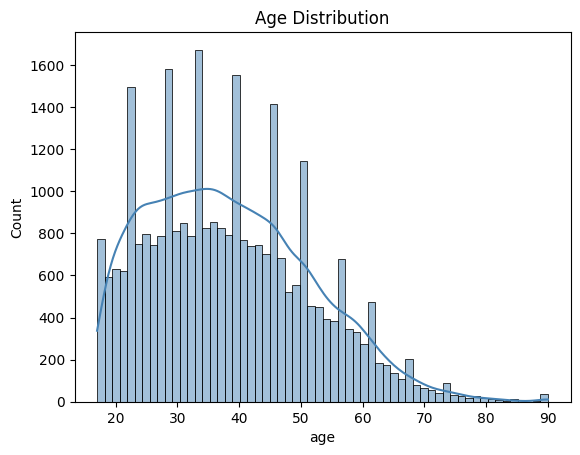

In [ ]:
# Age distribution
sns.histplot(df['age'], kde=True, color='steelblue')
plt.title("Age Distribution")
plt.show()

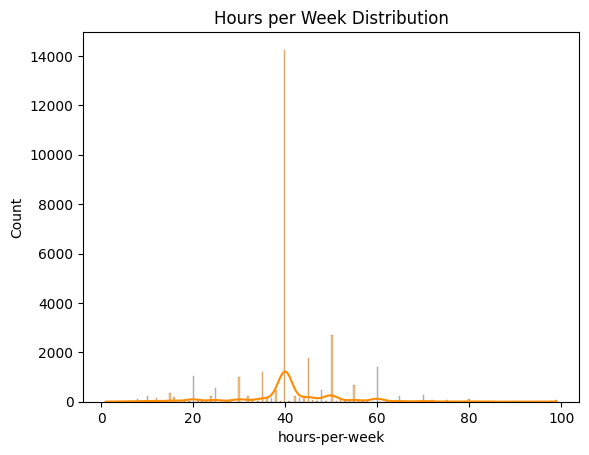

In [ ]:
# Hours per week distribution
sns.histplot(df['hours-per-week'], kde=True, color='darkorange')
plt.title("Hours per Week Distribution")
plt.show()

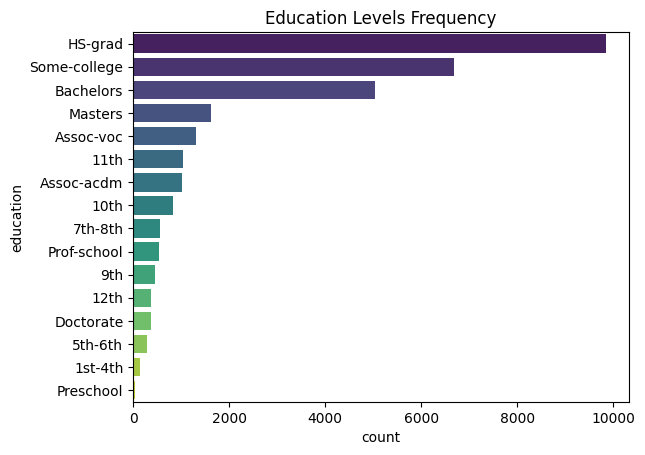

In [ ]:
# Education frequency
sns.countplot(y='education', data=df, order=df['education'].value_counts().index, palette='viridis')
plt.title("Education Levels Frequency")
plt.show()

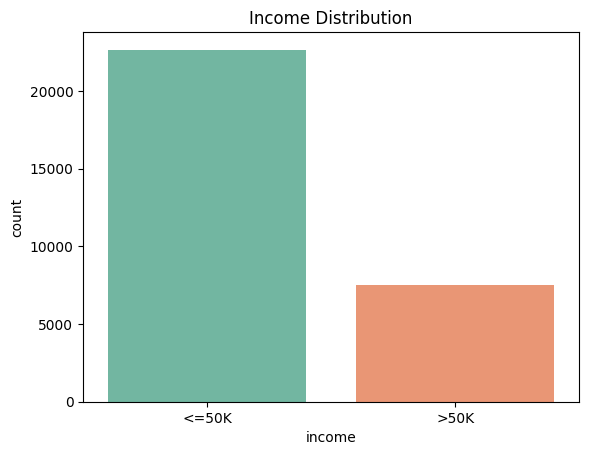

In [ ]:
# Income frequency
sns.countplot(x='income', data=df, palette='Set2')
plt.title("Income Distribution")
plt.show()

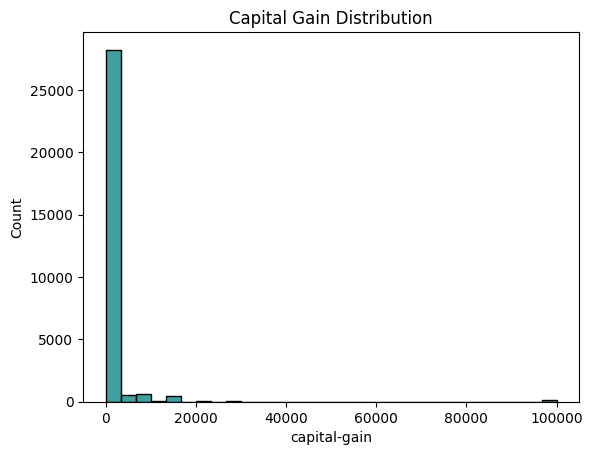

In [ ]:
# Capital gain distribution
sns.histplot(df['capital-gain'], bins=30, kde=False, color='teal')
plt.title("Capital Gain Distribution")
plt.show()

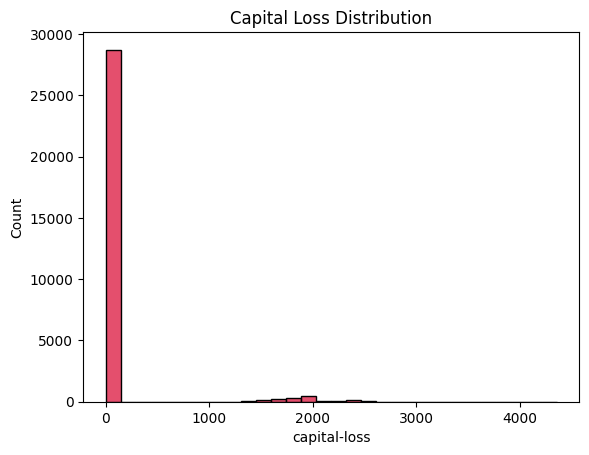

In [ ]:
# Capital loss distribution
sns.histplot(df['capital-loss'], bins=30, kde=False, color='crimson')
plt.title("Capital Loss Distribution")
plt.show()

# Bivariate Analysis

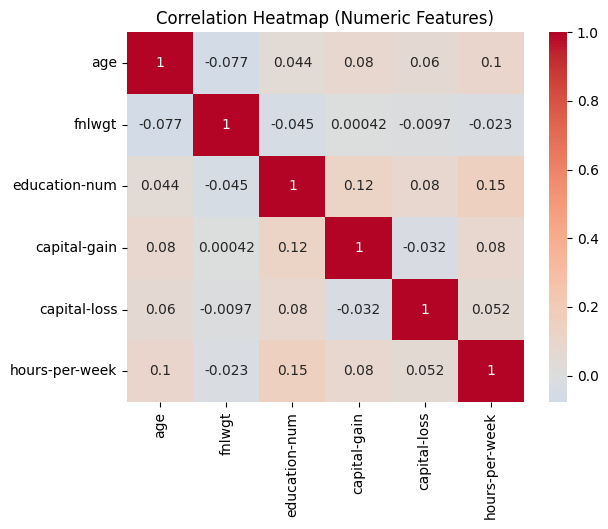

In [ ]:
# Correlation heatmap for numeric features
num_cols = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
corr = df[num_cols].corr()
sns.heatmap(corr, cmap='coolwarm', center=0, annot=True)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

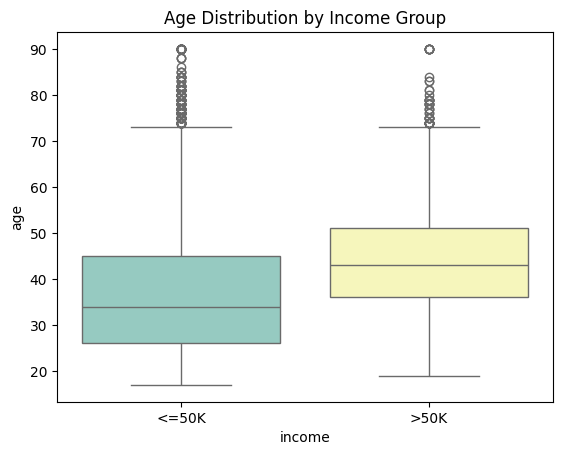

In [ ]:
# Income vs Age
sns.boxplot(x='income', y='age', data=df, palette='Set3')
plt.title("Age Distribution by Income Group")
plt.show()

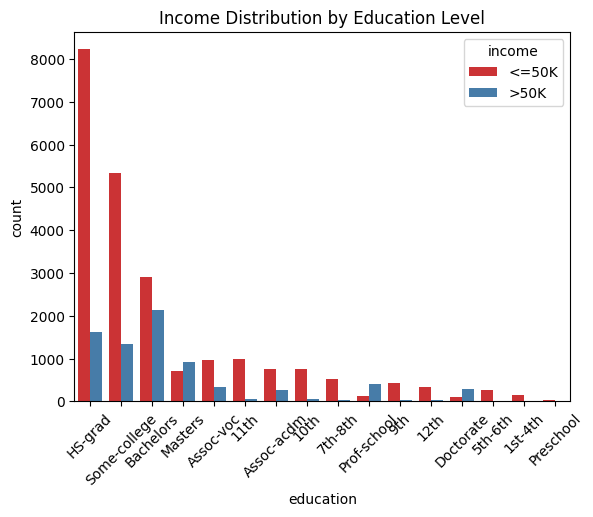

In [ ]:
# Income vs Education
sns.countplot(x='education', hue='income', data=df, order=df['education'].value_counts().index, palette='Set1')
plt.xticks(rotation=45)
plt.title("Income Distribution by Education Level")
plt.show()

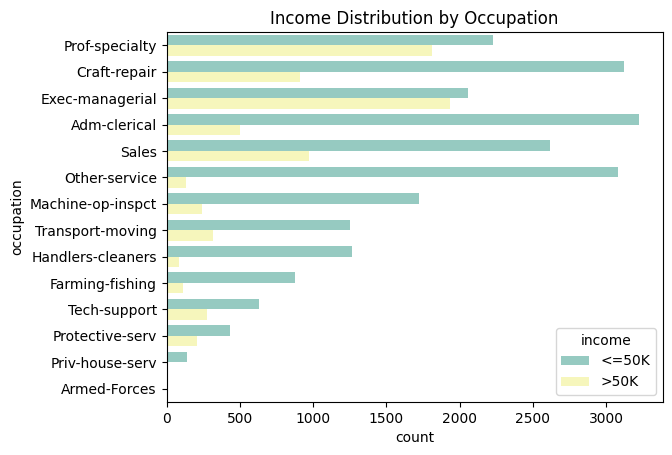

In [ ]:
# Income by occupation
sns.countplot(y='occupation', hue='income', data=df,
              order=df['occupation'].value_counts().index, palette='Set3')
plt.title("Income Distribution by Occupation")
plt.show()

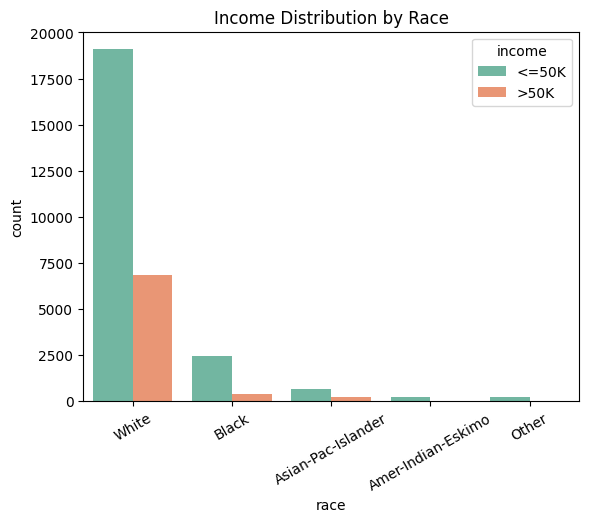

In [ ]:
# Income by race
sns.countplot(x='race', hue='income', data=df, palette='Set2',
              order=df['race'].value_counts().index)
plt.title("Income Distribution by Race")
plt.xticks(rotation=30)
plt.show()

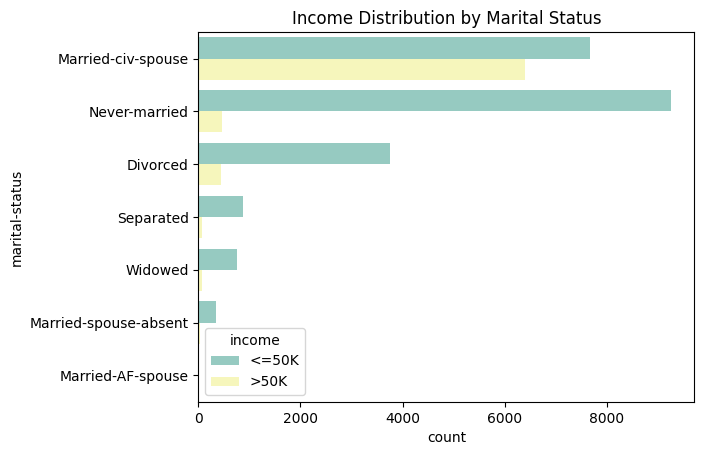

In [ ]:
# Income by marrital status
sns.countplot(y='marital-status', hue='income', data=df,
              order=df['marital-status'].value_counts().index, palette='Set3')
plt.title("Income Distribution by Marital Status")
plt.show()

# Multivariate Analysis

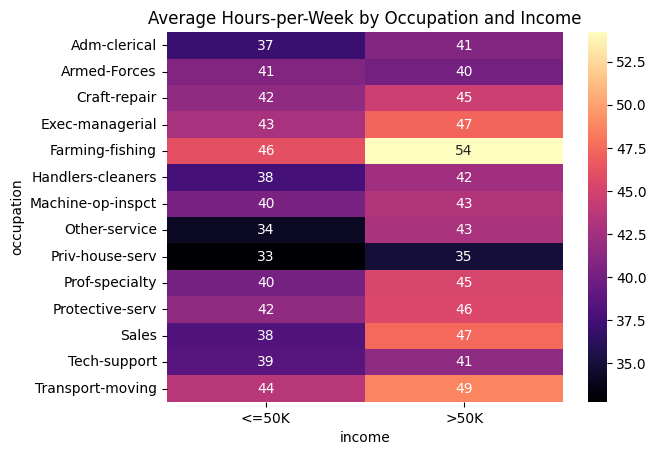

In [ ]:
# Pivot heatmap: average hours-per-week by occupation and income
pivot = df.pivot_table(index='occupation', columns='income', values='hours-per-week', aggfunc='mean')
sns.heatmap(pivot, cmap='magma', annot=True)
plt.title("Average Hours-per-Week by Occupation and Income")
plt.show()

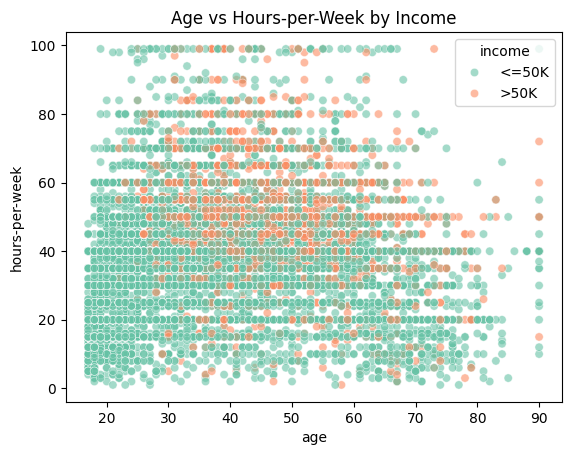

In [ ]:
# Scatterplot: Age vs Hours-per-week colored by Income
sns.scatterplot(x='age', y='hours-per-week', hue='income', data=df, alpha=0.6)
plt.title("Age vs Hours-per-Week by Income")
plt.show()

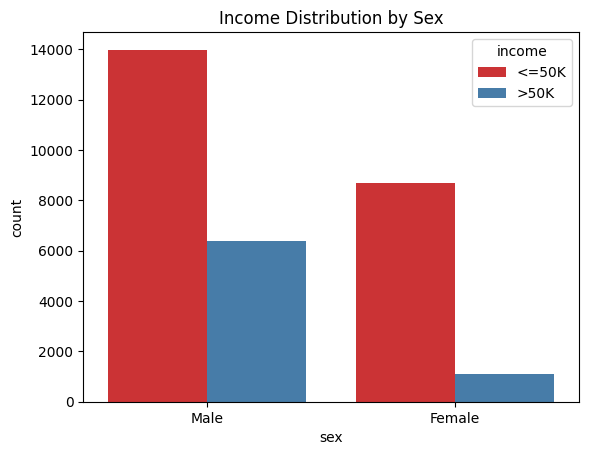

In [ ]:
# Income by sex
sns.countplot(x='sex', hue='income', data=df, palette='Set1')
plt.title("Income Distribution by Sex")
plt.show()

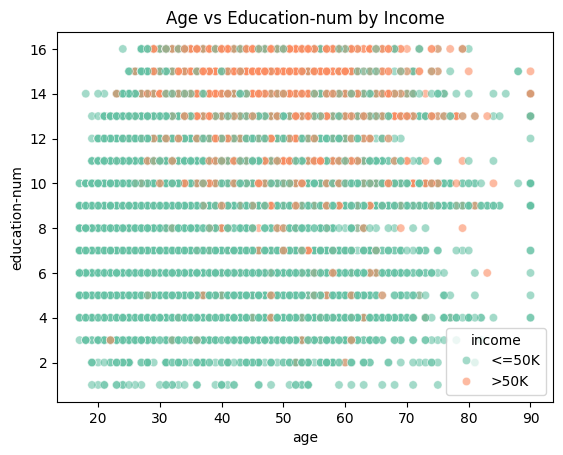

In [ ]:
# Age vs Education-num by Income
sns.scatterplot(x='age', y='education-num', hue='income', data=df, alpha=0.6)
plt.title("Age vs Education-num by Income")
plt.show()

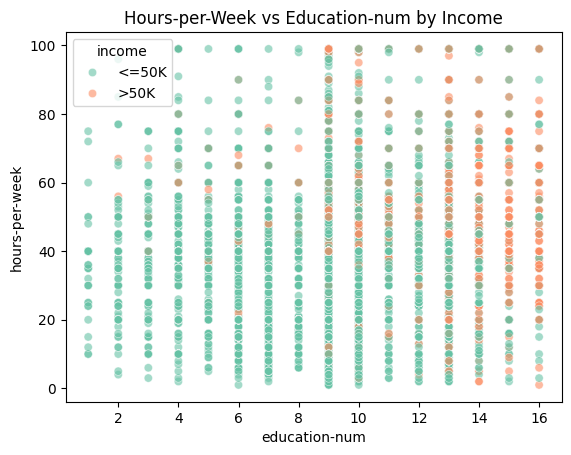

In [ ]:
# Hours-per-Week vs Education-num by Income
sns.scatterplot(x='education-num', y='hours-per-week', hue='income', data=df, alpha=0.6)
plt.title("Hours-per-Week vs Education-num by Income")
plt.show()

#CONCLUSION #
In conclusion the adult income dataset reveals clear socio-economic patterns.
Education and occupation are key drivers of income.
While working hours and capital gains also play strong roles.
This project highlights disparities in income levels and provides a foundation for predictive modeling.
